<a href="https://colab.research.google.com/github/MinsooKwak/Data_Analysis/blob/main/HR/%EC%9A%B0%EB%A6%AC_%ED%9A%8C%EC%82%AC_%EC%9A%B0%EC%88%98%EC%84%B1%EA%B3%BC%EC%9E%90%EB%93%A4%EC%9D%80_%EC%96%B4%EB%96%A4_%ED%8A%B9%EC%84%B1%EC%9D%84_%EA%B0%96%EA%B3%A0_%EC%9E%88%EB%8A%94%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/drive/MyDrive/DA_degree/과제/1주차_HR/Data/데이터분석_Expert_HR_데이터.csv')
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0


## 데이터 전처리

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### 1. 결측치 확인

In [5]:
df.isna().sum()/len(df)

Age                         0.0
Attrition                   0.0
BusinessTravel              0.0
DailyRate                   0.0
Department                  0.0
DistanceFromHome            0.0
Education                   0.0
EducationField              0.0
EmployeeCount               0.0
EmployeeNumber              0.0
EnvironmentSatisfaction     0.0
Gender                      0.0
HourlyRate                  0.0
JobInvolvement              0.0
JobLevel                    0.0
JobRole                     0.0
JobSatisfaction             0.0
MaritalStatus               0.0
MonthlyIncome               0.0
MonthlyRate                 0.0
NumCompaniesWorked          0.0
Over18                      0.0
OverTime                    0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StandardHours               0.0
StockOptionLevel            0.0
TotalWorkingYears           0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsAtC

### 2. Data Discription

- 개인 특성
  - Age : 나이
  - Over18 : 18세 이상
  - Gender : 성별
  - DistanceFromHome : 집과의 거리
  - MaritalStatus : 결혼 여부

- 교육 관련
  - PerformanceRating : 업무 성과
  - TotalWorkingYears : 경력기간
  - Education : 교육의 정도
  - EducationField : 전공
  - TrainingTimesLastYear : 교육 시간  

- 보상
  - DailyRate : 일 대비 급여 수준
  - HourlyRate : 시간 대비 급여 수준
  - MonthlyIncome : 월 소득
  - MonthlyRate : 월 대비 급여 수준
  - PercentSalaryHike : 급여의 증가분 백분율
  - StockOptionLevel : 스톡옵션 정도

- 업무 관련 수준 및 만족도
  - 수준
    - Department : 업무 분야
    - BusinessTravel : 출장 빈도
    - JobInvolvement : 업무 참여도
    - JobLevel : 업무 수준
    - JobRole : 업무 종류
    - OverTime : 규정 외 노동시간
    - WorkLifeBalance : 일과 생활의 균형 정도
    - YearsAtCompany : 근속 연수
    - YearsInCurrentRole : 현재 역할의 년수
    - NumCompaniesWorkded : 일한 회사의 수
  - 만족도
    - JobSatisfaction : 업무 만족도
    - YearsSinceLastPromotion : 마지막 프로모션
    - YearsWithCurrManager : 현재 관리자와 함께 보낸 시간
    - Attrition : 퇴직 여부
    - EnvironmentSatisfaction : 업무 환경에 대한 만족도
    - RelationshipSatisfaction : 대인관계 만족도

- 기타
  - EmployeeCount : 직원 숫자
  - EmployeeNumber : 직원 ID
  - StandardHours : 표준 시간

**Orders**

In [6]:
gender_od = ['Male','Female']
marital_od = ['Married','Single','Divorced']
performance_rating_od = ['1','2','3','4']

edu_od = ['1','2','3','4','5']
edu_field_od = ['Life Sciences','Medical','Marketing','Technical Degree','Human Resource','Other']
trainingTime_od = ['0','1','2','3','4','5','6']

stock_od = ['0','1','2','3']

department_od = ['Sales', 'Research & Development', 'Human Resources']
bus_trip_od = ['Travel_Rarely', 'Travel_Frequently', 'Non-Travel']
job_involve_od = ['1','2','3','4']
job_level_od = ['1','2','3','4','5']
job_role_od = ['Sales Executive', 'Research Scientist', 'Laboratory Technician',
               'Manufacturing Director', 'Healthcare Representative', 'Manager',
               'Sales Representative', 'Research Director', 'Human Resources']

overtime_od = ['Yes','No']
worklife_od = ['1','2','3','4']
job_sat_od = ['1','2','3','4']
att_od = ['Yes','No']
env_sat_od = ['1','2','3','4']
rel_od = ['1','2','3','4']

#Data Visualization

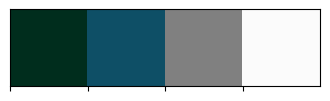

In [7]:
sns.palplot(['#002d1d','#0e4f66','gray','#fbfbfb'])

### 성과 구성의 비율은 어떻게 되는가?

In [8]:
x = df.groupby(['PerformanceRating'])['PerformanceRating'].count()
y = len(df)
r = ((x/y)).round(2)
ratio = pd.DataFrame(r).T
ratio

PerformanceRating,3,4
PerformanceRating,0.85,0.15


Text(0.125, 0.92, 'Performance Rating consists \nExcellent 85%, Outstanding 15%')

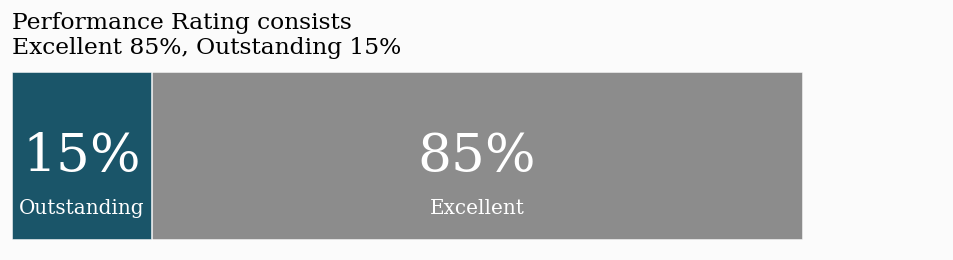

In [9]:
fig, ax = plt.subplots(1,1, figsize=(10, 2), dpi=120)
background_color = '#fbfbfb'
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color)

ax.barh(ratio.index, ratio[3], color='gray', alpha=0.9, ec=background_color, label='Excellent')
ax.barh(ratio.index, ratio[4], color='#0e4f66', alpha=0.9, ec=background_color, label='Outstanding')

ax.set_xlim(0,1)
ax.set_xticks([])
ax.set_yticks([])
ax.legend().set_visible(False)

for s in ['top','left','right','bottom']:
  ax.spines[s].set_visible(False)

for i in ratio.index:
  ax.annotate(f'{int(ratio[3][i]*100)}%', xy=((ratio[3][i]+ratio[4][i])/2, i),
              va='center', ha='center', fontsize=32, fontweight='light', fontfamily='serif', color='white')
  ax.annotate("Excellent", xy=((ratio[3]+ratio[4])/2, -0.25), va='center', ha='center', fontsize=12, fontweight='light', fontfamily='serif', color='white')

for i in ratio.index:
    ax.annotate(f"{int(ratio[4][i]*100)}%", xy=(ratio[4][i]/2, i),va = 'center', ha='center',fontsize=32, fontweight='light', fontfamily='serif',color='white')
    ax.annotate("Outstanding", xy=(ratio[4][i]/2, -0.25),va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',color='white')

fig.text(0.125, 0.92, "Performance Rating consists \nExcellent 85%, Outstanding 15%",
         fontfamily='serif', fontsize=14)


In [10]:
df.PerformanceRating = df.PerformanceRating.astype(str)
#df.Education = df.Education.astype(str)

In [11]:
df_exel = df[df['PerformanceRating']=='3']
df_out = df[df['PerformanceRating']=='4']
print(len(df_exel), len(df_out))

1244 226


In [12]:
import matplotlib.ticker as mtick

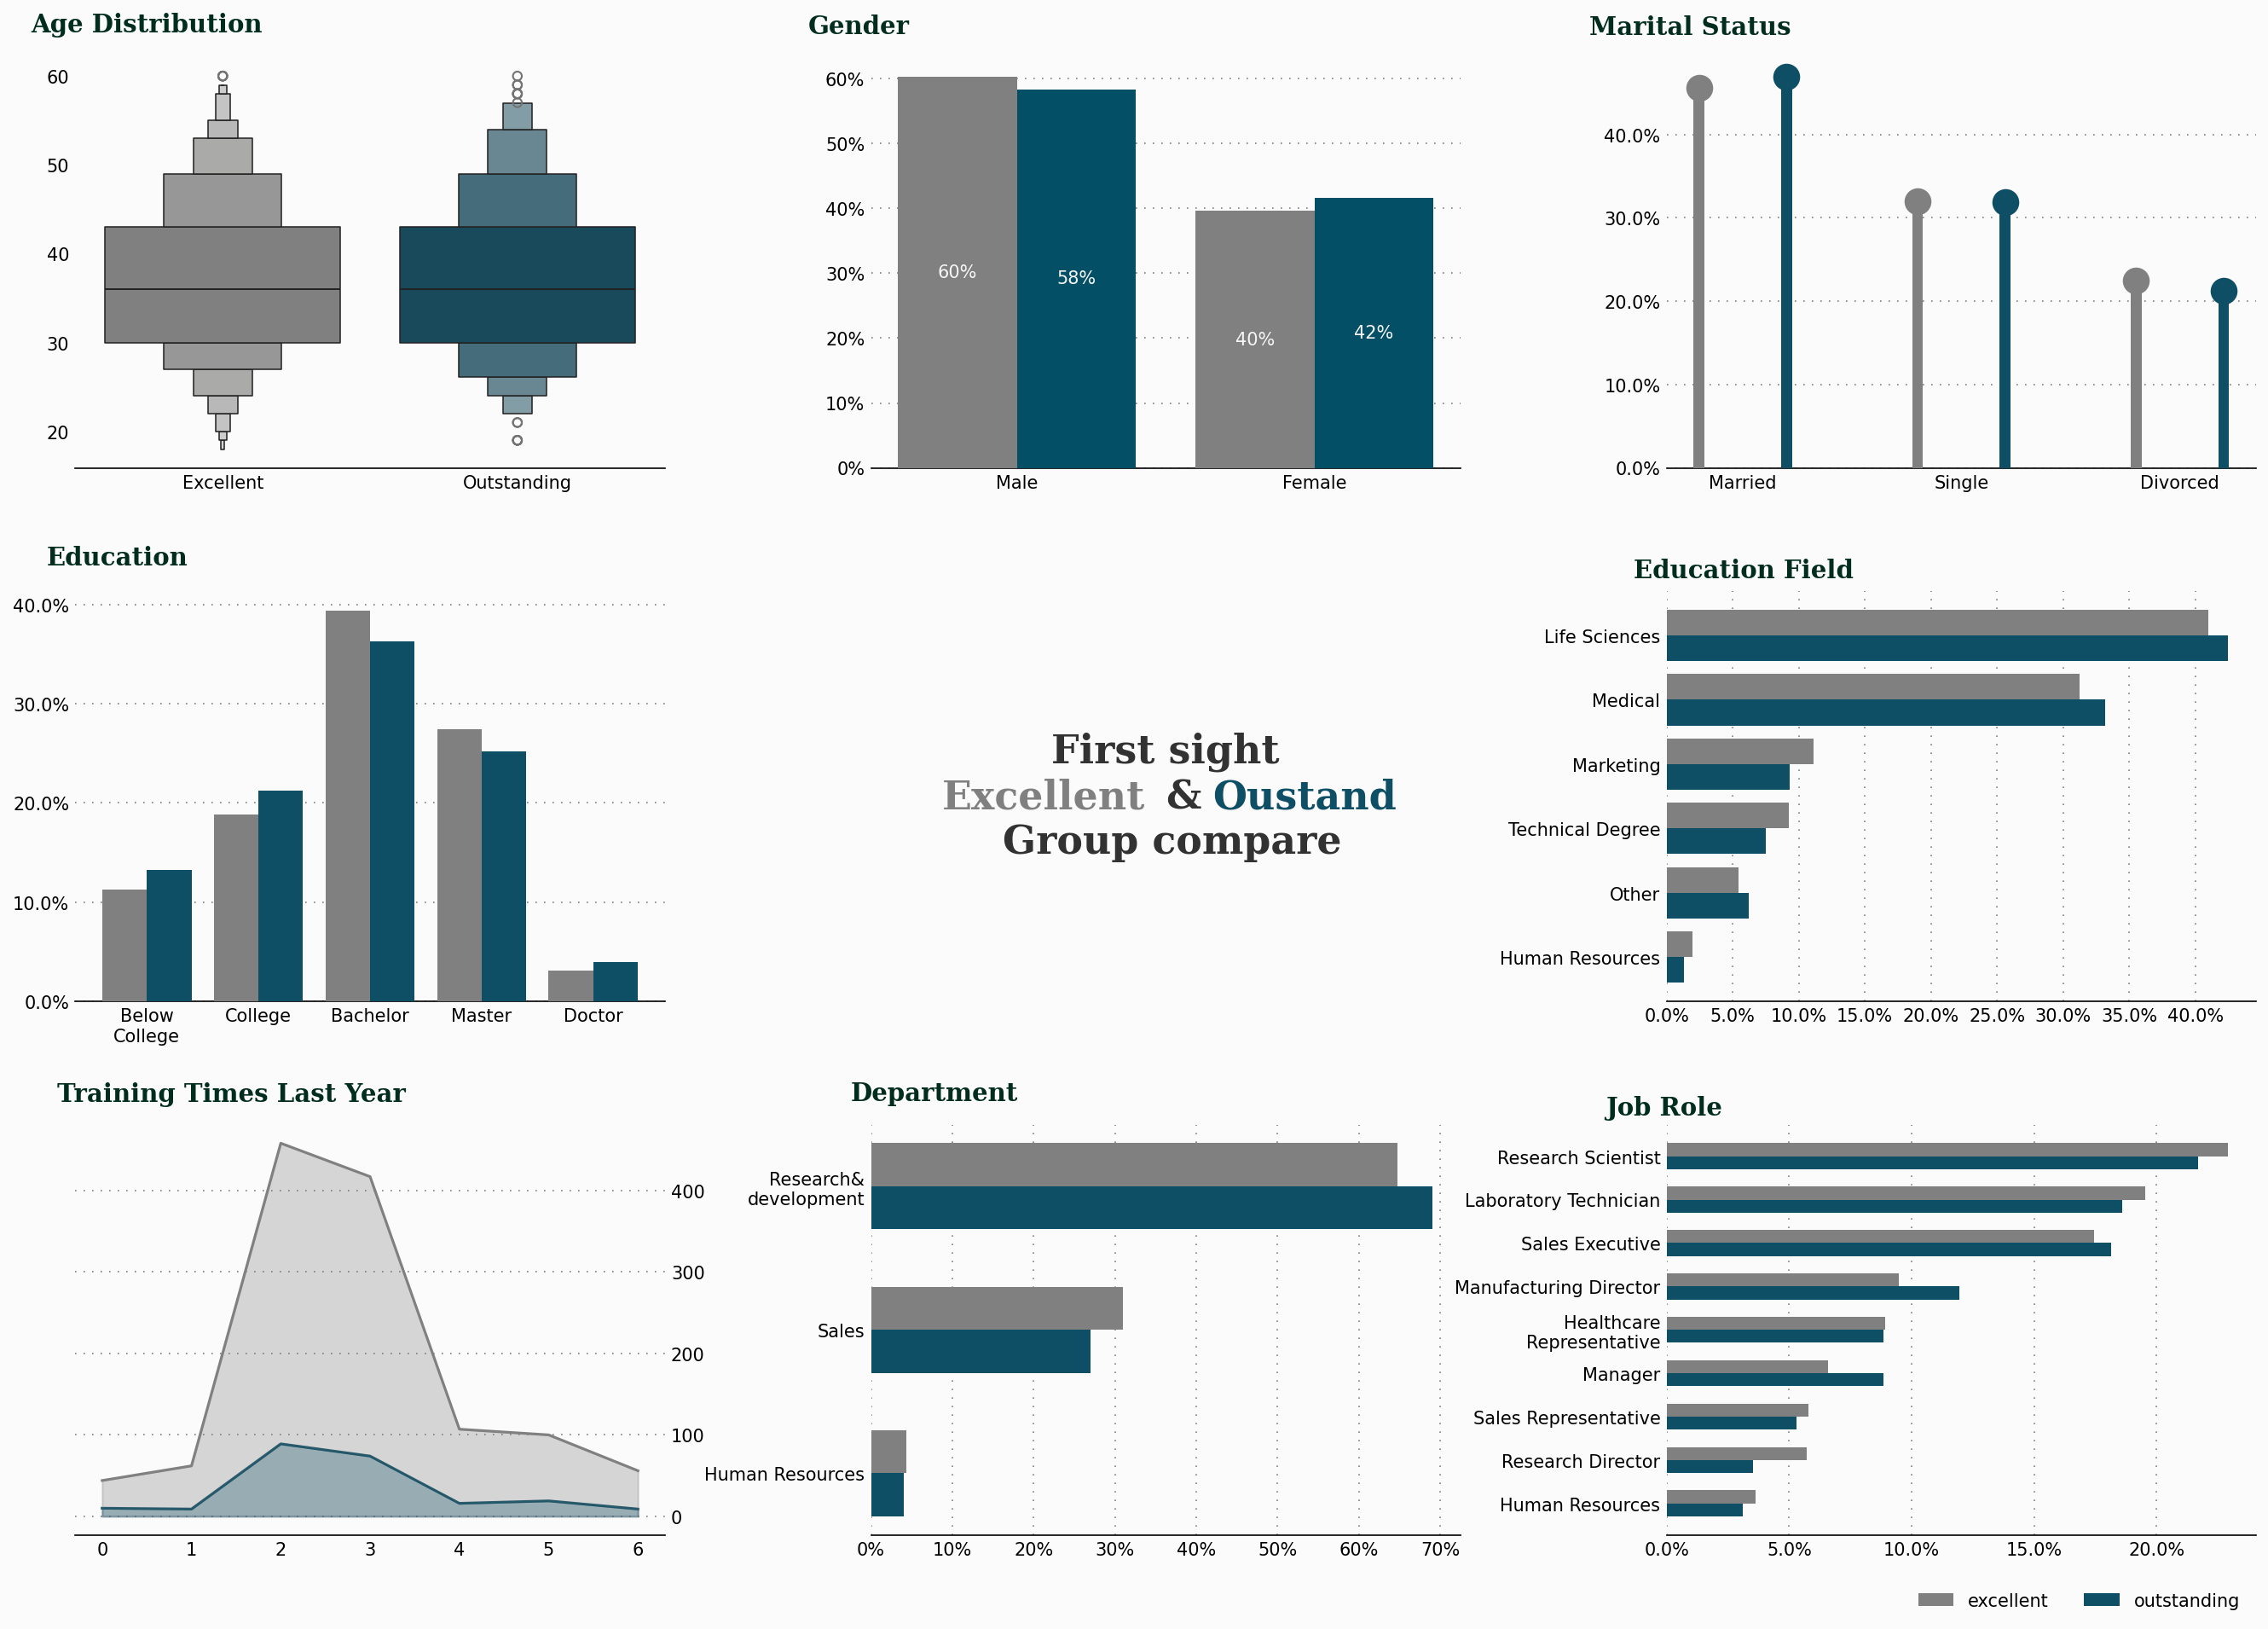

In [13]:
background_color = '#fbfbfb'

fig = plt.figure(figsize=(22,15), dpi=150)
fig.patch.set_facecolor(background_color)

#### grid (row, col)
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.35, hspace=0.3)

# ax 정보
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])
ax8 = fig.add_subplot(gs[2,2])


#### Ax0 - Age

# group 3
train = pd.DataFrame(df_exel['Age'])
train['Group'] = "Excellent" # 라벨 붙이기
# group4
test = pd.DataFrame(df_out['Age'])
test['Group'] = "Outstanding"
comb_graph_temp_age_df = pd.concat([train, test], axis=0)

# 아래로 붙이기
sns.boxenplot(ax=ax0, y='Age', x='Group', data=comb_graph_temp_age_df, palette=['gray','#0e4f66'])
ax0.text(-0.65,65, "Age Distribution", fontsize=14, fontweight='bold', fontfamily='serif', color="#002d1d")
ax0.set_xlabel("")
ax0.set_ylabel("")

#### Ax1 - Gender

# group 3
train = pd.DataFrame(df_exel['Gender'].value_counts())
train['percentage'] = train['count'].apply(lambda x:x/sum(train['count'])*100)
# group 4
test = pd.DataFrame(df_out['Gender'].value_counts())
test['percentage'] = test['count'].apply(lambda x:x/sum(test['count'])*100)

# 그래프
x = np.arange(len(train))
ax1.bar(x, height=train['percentage'], zorder=3, color='gray', width=0.4)
ax1.bar(x+0.4, height=test['percentage'], zorder=3, color='#034f66', width=0.4)
ax1.grid(color='gray', linestyle=':', axis='y', zorder=0, dashes=(1,5))
ax1.set_xticks(x+0.4/2)
ax1.set_xticklabels(gender_od)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax1.yaxis.set_major_locator(mtick.MultipleLocator(10))
# 퍼센테이지 표시
for i,j in zip([0,1], train['percentage']):
  ax1.annotate(f'{j:0.0f}%', xy=(i, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
for i, j in zip([0,1], test['percentage']):
  ax1.annotate(f'{j:0.0f}%', xy=(i+0.4, j/2), color="#f6f6f6", horizontalalignment='center', verticalalignment='center')

# text
ax1.text(-0.5, 67, "Gender",fontsize=14, fontweight='bold', fontfamily='serif', color="#002d1d")

#### Ax2 - MaritalStatus

# group3
train = pd.DataFrame(df_exel['MaritalStatus'].value_counts())
train['percentage'] = train['count'].apply(lambda x: x/sum(train['count'])*100).loc[marital_od]
# group4
test = pd.DataFrame(df_out['MaritalStatus'].value_counts())
test['percentage'] = test['count'].apply(lambda x: x/sum(test['count'])*100).loc[marital_od]

ax2.grid(color='gray', linestyle=':', axis='y', zorder=0, dashes=(1,5))
ax2.text(-0.5,52, "Marital Status", fontsize=14, fontweight='bold', fontfamily='serif', color="#002d1d")
ax2.bar(np.arange(len(train.index)), height=train['percentage'], zorder=3, color='gray', width=0.05)
ax2.scatter(np.arange(len(train.index)), train['percentage'], zorder=3, color='gray', s=200)
ax2.bar(np.arange(len(test.index))+0.4, height=test['percentage'], zorder=3, color='#0e4f66', width=0.05)
ax2.scatter(np.arange(len(test.index))+0.4, test['percentage'],zorder=3, color='#0e4f66', s=200)

# x축 레이블 포매팅
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.yaxis.set_major_locator(mtick.MultipleLocator(10))
ax2.set_xticks(np.arange(len(train.index))+0.4/2)
ax2.set_xticklabels(list(train.index), rotation=0)

#### Ax3 - Education

# group 3
train = pd.DataFrame(df_exel['Education'].value_counts())
train['percentage'] = train['count'].apply(lambda x: x/sum(train['count'])*100)
train.reset_index(inplace=True)
train.sort_values(by='Education', inplace=True)
train.set_index('Education', drop=False, inplace=True)

# group 4
test = pd.DataFrame(df_out['Education'].value_counts())
test['percentage'] = test['count'].apply(lambda x: x/sum(test['count'])*100)
test.reset_index(inplace=True)
test.sort_values(by='Education', inplace=True)
test.set_index('Education',drop=False, inplace=True)


x = np.arange(len(train))
ax3.grid(color='gray', linestyle=':', axis='y', zorder=0,dashes=(1,5))
ax3.bar(train.index, height=train['percentage'], zorder=3, color='gray', width=0.4)
ax3.bar(test.index+0.4, height=test['percentage'], zorder=3, color='#0e4f66', width=0.4)
ed_list = ['Below\nCollege','College','Bachelor','Master','Doctor']
ax3.set_xticks((train.index)+0.4/2)
ax3.set_xticklabels(ed_list, rotation=0)
ax3.yaxis.set_major_formatter(mtick.PercentFormatter())
ax3.yaxis.set_major_locator(mtick.MultipleLocator(10))

ax3.text(0.3, 44, "Education",fontsize=14, fontweight='bold', fontfamily='serif', color="#002d1d")

#### Ax4 - Text (전체 Status)

ax4.spines['bottom'].set_visible(False)
ax4.spines["top"].set_visible(False)
ax4.spines["left"].set_visible(False)
ax4.spines["right"].set_visible(False)

ax4.tick_params(left=False, bottom=False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.text(0.5, 0.5, 'First sight\n\n Group compare', horizontalalignment='center', verticalalignment='center',fontsize=22, fontweight='bold', fontfamily='serif', color="#323232")
ax4.text(0.12,0.47,"Excellent", fontweight="bold", fontfamily='serif', fontsize=22, color='gray')
ax4.text(0.5,0.47,"&", fontweight="bold", fontfamily='serif', fontsize=22, color='#323232')
ax4.text(0.58,0.47,"Oustand", fontweight="bold", fontfamily='serif', fontsize=22, color='#0e4f66')

#### Ax5 - EducationField

train = pd.DataFrame(df_exel['EducationField'].value_counts())
train['percentage'] = train['count'].apply(lambda x: x/sum(train["count"])*100)
test = pd.DataFrame(df_out['EducationField'].value_counts())
test["percentage"] = test["count"].apply(lambda x: x/sum(test["count"])*100)

ax5.grid(color='gray', linestyle=':', axis='x', zorder=0, dashes=(1,5))
ax5.barh(np.arange(len(train.index)), train['percentage'], zorder=3, color='gray', height=0.4)
ax5.barh(np.arange(len(test.index))+0.4, test["percentage"], zorder=3, color="#0e4f66", height=0.4)
ax5.text(-2.5, -0.7, 'Education Field', fontsize=14, fontweight='bold', fontfamily='serif', color="#002d1d")
ax5.xaxis.set_major_formatter(mtick.PercentFormatter())
ax5.yaxis.set_major_locator(mtick.MultipleLocator(1))
ax5.set_yticks(np.arange(len(test.index))+0.4 / 2)
ax5.set_yticklabels(list(test.index))
ax5.invert_yaxis()  # 거꾸로 ascending하기


#### Ax6 - TrainingTimesLastYear

color = ['gray', '#0e4f66']
ax6.grid(color='gray', linestyle=':', axis='y', zorder=0, dashes=(1,5))

for i, tty in enumerate(df['PerformanceRating'].value_counts().index):
  tty_rel = df[df['PerformanceRating']==tty]['TrainingTimesLastYear'].value_counts().sort_index()
  ax6.plot(tty_rel.index, tty_rel, color=color[i], label=tty)
  ax6.fill_between(tty_rel.index, 0, tty_rel, color=color[i], alpha=0.3, zorder=3)

ax6.yaxis.tick_right()
ax6.text(-0.5, 510, "Training Times Last Year",fontsize=14, fontweight='bold', fontfamily='serif', color="#002d1d")

#### Ax7 - Department (업무 분야)

train = pd.DataFrame(df_exel['Department'].value_counts())
train['percentage'] = train['count'].apply(lambda x: x/sum(train["count"])*100)
test = pd.DataFrame(df_out['Department'].value_counts())
test["percentage"] = test["count"].apply(lambda x: x/sum(test["count"])*100)

ax7.grid(color='gray', linestyle=':', axis='x', zorder=0, dashes=(1,5))
ax7.barh(np.arange(len(train.index)), train['percentage'], zorder=3, color='gray', height=0.3)
ax7.barh(np.arange(len(test.index))+0.3, test["percentage"], zorder=3, color="#0e4f66", height=0.3)
ax7.text(-2.5, -0.45, 'Department', fontsize=14, fontweight='bold', fontfamily='serif', color="#002d1d")
ax7.xaxis.set_major_formatter(mtick.PercentFormatter())
ax7.yaxis.set_major_locator(mtick.MultipleLocator(1))
ax7.set_yticks(np.arange(len(test.index))+0.3 / 2)
ax7.set_yticklabels(['Research&\ndevelopment', 'Sales', 'Human Resources'])
ax7.invert_yaxis()  # 거꾸로 ascending하기

#### Ax8 - JobRole (업무 종류)

train = pd.DataFrame(df_exel['JobRole'].value_counts())
train['percentage'] = train['count'].apply(lambda x: x/sum(train['count'])*100)
test = pd.DataFrame(df_out['JobRole'].value_counts())
test['percentage'] = test['count'].apply(lambda x: x/sum(test['count'])*100)

ax8.grid(color='gray', linestyle=':', axis='x', zorder=0, dashes=(1,5))
ax8.barh(np.arange(len(train.index)), train['percentage'], zorder=3, color='gray', height=0.3, label='excellent')
ax8.barh(np.arange(len(test.index))+0.3, test["percentage"], zorder=3, color="#0e4f66", height=0.3, label='outstanding')
ax8.text(-2.5, -0.8, 'Job Role', fontsize=14, fontweight='bold', fontfamily='serif', color="#002d1d")
ax8.xaxis.set_major_formatter(mtick.PercentFormatter())
ax8.yaxis.set_major_locator(mtick.MultipleLocator(1))
job_od = ['Research Scientist', 'Laboratory Technician', 'Sales Executive',
          'Manufacturing Director', 'Healthcare\nRepresentative', 'Manager','Sales Representative',
          'Research Director', 'Human Resources']
ax8.set_yticks(np.arange(len(test.index))+0.3 / 2)
ax8.set_yticklabels(job_od)
ax8.invert_yaxis()

#### 후처리
# ax의 색상 배경 색상과 동일하게 채우기
for i in range(0,9):
  locals()['ax'+str(i)].set_facecolor(background_color)

# 눈금, 눈금 레이블 및 격자 선 매개변수 양쪽 축에 적용
for i in range(0,9):
  locals()['ax'+str(i)].tick_params(axis=u'both', which=u'both', length=0)

# 축 지우기
for s in ['top','right','left']:
  for i in range(0,9):
    locals()['ax'+str(i)].spines[s].set_visible(False)

plt.legend(ncol=2, bbox_to_anchor=(1, -0.1), facecolor=background_color, edgecolor=background_color)

# 선 추가
import matplotlib.lines as lines
#l1 = lines.Line2D(xdata=[0.1, 0.9], ydata=[0,0], transform=fig.transFigure, figure=fig, color='black', lw=0.2)
#fig.lines.extend([l1])

plt.show()

# 확인 필요 사항
## 1. Gender에서 거의 비슷하지만 성별에 대한 영향이 있는지 확인
## 2.

**Insight**

```
[Point1]
There is Interesting point difference between Performance Group.
Despite Age Distribution have no notable difference,
Oustanding Group Education exceeds at Below College, College, and Doctor Group.
We could ponder why this might be;

case1. Ambitious about there Job. They Dive into there Job Early.
       Also Outstanding after Doctor, more professional.

case2. Age between 20-30 Have ambitious about there Job.
       They are still building there career, also developing Education.

[Point2] Gender
Each Performance Group have difference portion of Male/Female.
Despite little difference, we can ponder what makes difference.

[Point3]
Life Sciences, Medical exceeds at outstanding group.
Is something working with Education Field?
Looking up Department feature, Oustanding Group exceeds at 'Research & Development' field.
We could also see later work;
Sales and Marketing aligns, human Resource also aligns with Education field.

[Point4]
Despite Department portion in Performance group,
There is Interesting point in 'Job Role' result.
Why Oustanding Group exceeds at Sales Executive,
and why Excellent Group exceeds at Research Scientist and Research Director?

There are notable difference
- Oustanding Group | Manufacturing Director, Manager.
- Excellent Group  | Research Director

```

### Age 분석

In [14]:
def age_seg(st):
  if (st>10) & (20>st):
    st = '10s'
  elif (st>=20) & (30>st):
    st = '20s'
  elif (st>=30) & (40>st):
    st = '30s'
  elif (st>=40) & (50>st):
    st = '40s'
  elif (st>=50) * (60>=st):
    st = 'over 50s'
  return st

In [15]:
def education_txt(st):
  st = str(int)
  st = st.replace("1", "Below College").replace("2", "College").replace("3", "Bachelor").replace("4", "Master").replace("5", "Doctor")
  return st

In [16]:
df['Age_segment'] = df['Age'].apply(age_seg)

In [17]:
age_seg_df = df[['Age','Age_segment','Education','Gender','EducationField','JobRole','PerformanceRating']]
age_seg_df.head(3)

,Age,Age_segment,Education,Gender,EducationField,JobRole,PerformanceRating
0,41,40s,2,Female,Life Sciences,Sales Executive,3
1,49,40s,1,Male,Life Sciences,Research Scientist,4
2,37,30s,2,Male,Other,Laboratory Technician,3


In [18]:
# for correlation
age_seg_df2 = age_seg_df[['Age','Education','Gender','EducationField','JobRole','PerformanceRating']]
age_seg_df2.loc[age_seg_df['Education'] == 1]['Education'] = "Below College"
age_seg_df2.loc[age_seg_df['Education'] == 2]['Education'] = "College"
age_seg_df2.loc[age_seg_df['Education'] == 3]['Education'] = "Bachelor"
age_seg_df2.loc[age_seg_df['Education'] == 4]['Education'] = "Master"
age_seg_df2.loc[age_seg_df['Education'] == 5]['Education'] = "Doctor"
age_seg_df2['Age'] = age_seg_df['Age']
#age_seg_df2['Gender'] = age_seg_df['Gender']

In [19]:
def edu_text(st):
  st = str(st)
  st = st.replace('1', "Below College")
  st = st.replace('2', "College")
  st = st.replace('3', "Bachelor")
  st = st.replace('4', "Master")
  st = st.replace('5', "Doctor")
  return st

In [20]:
age_seg_df2['Education'] = age_seg_df2['Education'].apply(edu_text)
age_seg_df2.head(3)

,Age,Education,Gender,EducationField,JobRole,PerformanceRating
0,41,College,Female,Life Sciences,Sales Executive,3
1,49,Below College,Male,Life Sciences,Research Scientist,4
2,37,College,Male,Other,Laboratory Technician,3


In [21]:
# 범주형 변수를 더미 변수로 변환
dummy_df = pd.get_dummies(age_seg_df2[['Education','Gender','EducationField','JobRole','PerformanceRating']])
df_corr = pd.concat([age_seg_df2, dummy_df], axis=1)
df_corr.drop(['Education','Gender','EducationField','JobRole','PerformanceRating'], axis=1, inplace=True)
age_correlation_matrix = df_corr.corr()

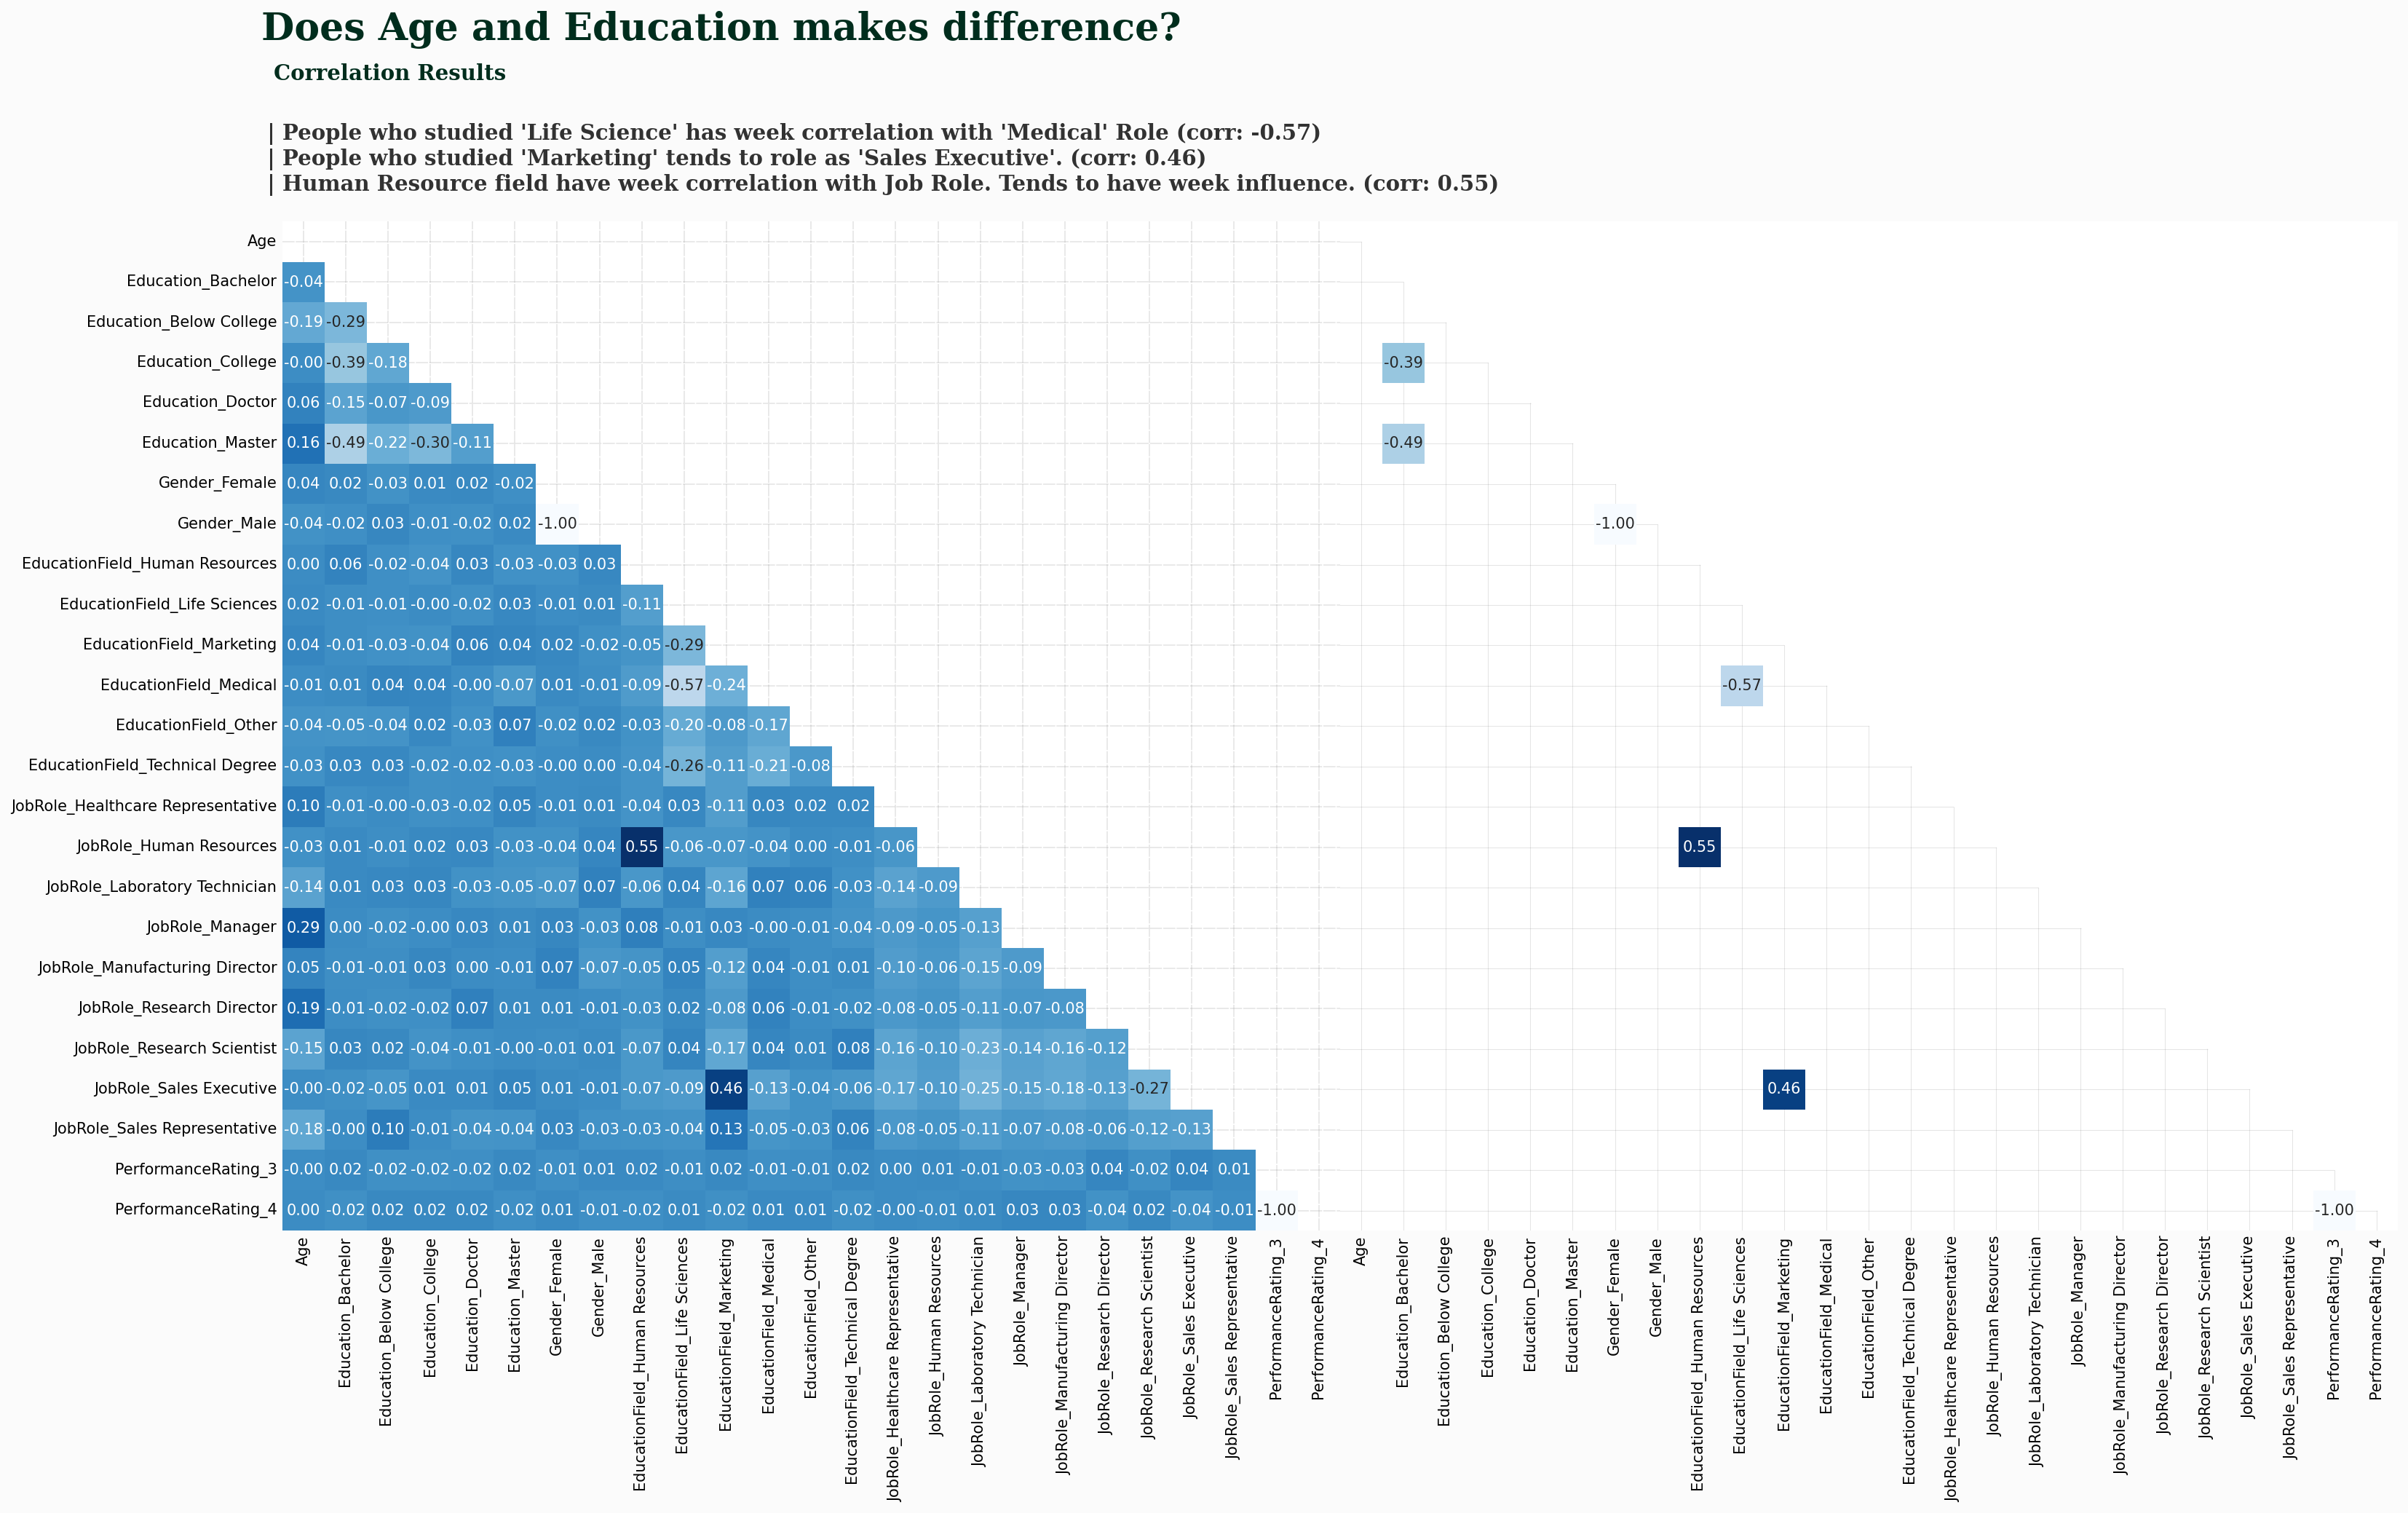

In [22]:
background_color = '#fbfbfb'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25,12), dpi=150)
fig.patch.set_facecolor(background_color)

sns.heatmap(age_correlation_matrix, ax=axes[0], cmap='Blues', annot=True, fmt=".2f",cbar=False,zorder=3,
            mask=np.triu(np.ones_like(age_correlation_matrix, dtype=bool)))

mask = ((age_correlation_matrix >= 0.3) | (age_correlation_matrix <= -0.3)) & (age_correlation_matrix !=1.0)
sns.heatmap(age_correlation_matrix, ax=axes[1], cmap='Blues', annot=True, fmt=".2f",mask=~mask,
            cbar=False, yticklabels=False, zorder=2)


inside_txt = """
  | People who studied 'Life Science' has week correlation with 'Medical' Role (corr: -0.57)
  | People who studied 'Marketing' tends to role as 'Sales Executive'. (corr: 0.46)
  | Human Resource field have week correlation with Job Role. Tends to have week influence. (corr: 0.55)
"""

axes[0].text(-0.5, -4.5, "Does Age and Education makes difference? ",fontsize=25, fontweight='bold', fontfamily='serif', color="#002d1d")
axes[0].text(-0.2, -3.5, "Correlation Results ",fontsize=14, fontweight='bold', fontfamily='serif', color="#002d1d")
axes[0].text(-0.7, -0.15, inside_txt ,fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")


# 길이 10, 간격 15인 점선 표현
axes[0].grid(color='gray', linestyle='-', axis='both', zorder=0, dashes=(10,1), alpha=0.2)
axes[1].set_xticks(np.arange(age_correlation_matrix.shape[1]) + 0.5, minor=False)
axes[1].set_yticks(np.arange(age_correlation_matrix.shape[0]) + 0.5, minor=False)
axes[1].grid(which='both', color='gray', linestyle='-', linewidth=0.5, alpha=0.2, zorder=4)

# 삼각형
x = np.array([0, 100, 100])  # 삼각형의 x 좌표
y = np.array([0, 0, 100])    # 삼각형의 y 좌표
plt.fill(x, y, 'white', alpha=1, zorder=3)


for s in ['top','right','left']:
  for i in range(0,9):
    locals()['ax'+str(i)].spines[s].set_visible(False)

axes[0].tick_params(axis=u'both', which=u'both', length=0)
axes[1].tick_params(axis=u'both', which=u'both', length=0)

plt.subplots_adjust(wspace=0)

#### 후처리
# 눈금, 눈금 레이블 및 격자 선 매개변수 양쪽 축에 적용
for i in range(0,9):
  locals()['ax'+str(i)].tick_params(axis=u'both', which=u'both', length=0)

# 축 지우기
for s in ['top','right','left']:
  for i in range(0,9):
    locals()['ax'+str(i)].spines[s].set_visible(False)

plt.show()

In [23]:
#### 추후 분석 대상
#df[['PerformanceRating','Department','JobRole']].value_counts(normalize=True).to_frame().sort_values(by='PerformanceRating')

In [24]:
#df[['Department','EducationField']].value_counts().to_frame().sort_values(by='Department', ascending=False)